## クラウドファンディングの成功予測

**名前:**西原龍介

**使用データ元:**https://www.kaggle.com/kemical/kickstarter-projects

**変数一覧**
![](変数一覧.png)

# 1.データセットの中身の確認

In [1]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [2]:
#データの読み込み
df = pd.read_csv("ks-projects-201801.csv", encoding = "utf8", engine = "python")
display(df.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00



次に欠損値の有無の確認と目的変数となるstateの中身を確認する．


In [3]:
#欠損値の確認
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [4]:
#stateが持つ値の種類の確認
df["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

stateにはfailedとsuccessful以外に状態を持つことが分かった．

今回はクラウドファンディングが成功するかどうかの予測の為，successfulとfailedのデータのみを使う．

In [5]:
#成功か失敗の予測なのでsuccessfulとfailedのデータのみを抽出
df = df[(df["state"] == "failed") | (df["state"] == "successful")]
df_new = df.copy()
display(df_new)
df_new.isnull().sum()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0.00,0.00,2406.39
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,2014-09-02 17:11:50,0.00,failed,0,US,0.00,0.00,5000.00


ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
dtype: int64

# 2.データの前処理

まず，launchedとdeadlineからクラウドファンディングを行う日数(期間)を求め，1つの特徴量として考える．

In [6]:
#期間の算出
df["launched"] = pd.to_datetime(df["launched"], errors = "coerce")
df["deadline"] = pd.to_datetime(df["deadline"], errors = "coerce")
df["day"] = (df["deadline"] - df["launched"]).dt.days

次に量的変数の分布を調べる．今回は成功の予測を行うため使用できる説明変数が制限される．

変数一覧を確認すると公募された金額と支援者はクラウドファンディングが終わらなければ得られない情報の為使用できない．

また，目標公募金額はgoalの方は単位が違うため，ドルに統一された方の目標公募金額を使用する．

よって今回使用できる量的変数はドルに統一された目標公募金額と期間の2種類である．

まず，目標公募金額の分布について調べる．

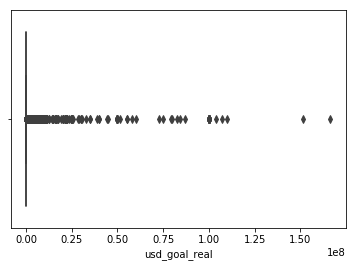

count    3.316750e+05
mean     4.151000e+04
std      1.108930e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

In [7]:
sns.boxplot(df["usd_goal_real"])
plt.show()
des_goal = df["usd_goal_real"].describe()
des_goal

箱ひげ図より，非常に大きな値の外れ値が多いことがわかる．実際にクラウドファンディングで相当な金額を募って作成されたゲームが存在するため，今回の外れ値は入力ミス等ではないと考えられる．

このままでは取り扱いにくいため，箱ひげ図の情報から5つの区間にカテゴライズする．

第一四分位数をQ1，第二四分位数をQ2，第三四分位数をQ3として

0: usd_goal_real < Q1

1: Q1 ≦ usd_goal_real < Q2

2: Q2 ≦ usd_goal_real < Q3

3: Q3 ≦ usd_goal_real < Q3 + 1.5×(Q3 - Q1)

4: Q3 + 1.5×(Q3 - Q1) ≦ usd_goal_real < 200000000

となるようにカテゴライズする．

In [8]:
Q1 = int(des_goal[4])
Q3 = int(des_goal[6])
Q2 = int(des_goal[5])
max_ = int(Q3 + (Q3 - Q1)*1.5)
df_new["goal_band"] = pd.cut(df["usd_goal_real"], [0, Q1, Q2, Q3, max_, 2e8], labels=range(5), right=False)

次に期間の分布を調べる

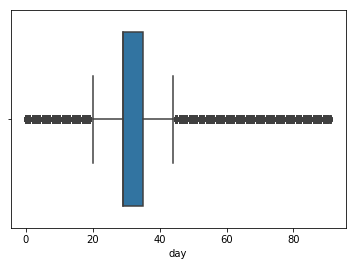

count    331675.000000
mean         32.954902
std          12.713329
min           0.000000
25%          29.000000
50%          29.000000
75%          35.000000
max          91.000000
Name: day, dtype: float64

In [9]:
sns.boxplot(df["day"])
plt.show()
des_day = df["day"].describe()
des_day

箱ひげ図より，非常に小さな値や非常に大きな値の外れ値があることがわかる．数か月単位やかなりの短期間で行うことは考えられるためこれも異常値とは考えられない．

先ほどと同様，このままでは取り扱いにくいため5つにカテゴライズ化する．

第一四分位数をQ1, 第三四分位数をQ3として

0: day < Q1 - 1.5×(Q3 - Q1)

1: Q1 - 1.5×(Q3 - Q1) ≦ day < Q1

2: Q1 ≦ day < Q3

3: Q3 ≦ day < Q3 + 1.5×(Q3 - Q1)

4: Q3 + 1.5×(Q3 - Q1) ≦ day < 100

となるようにカテゴライズする．

In [10]:
Q1 = int(des_day[4])
Q3 = int(des_day[6])
min_ = int(Q1 - (Q3 - Q1)*1.5)
max_ = int(Q3 + (Q3 - Q1)*1.5)
df_new["day_band"] = pd.cut(df["day"], [0,  min_, Q1, Q3, max_, 100], labels=range(5), right=False)

In [11]:
#予測に使用することができない変数及び必要がない変数削除
df_new = df_new.drop(["ID", "name", "deadline", "goal", "launched", "pledged", "backers", "usd pledged", "usd_pledged_real", "usd_goal_real"], axis = 1)
display(df_new)

,category,main_category,currency,state,country,goal_band,day_band
0,Poetry,Publishing,GBP,failed,GB,0,4
1,Narrative Film,Film & Video,USD,failed,US,3,4
2,Narrative Film,Film & Video,USD,failed,US,4,4
3,Music,Music,USD,failed,US,2,2
5,Restaurants,Food,USD,successful,US,4,2
6,Food,Food,USD,successful,US,0,0
7,Drinks,Food,USD,failed,US,3,4
10,Nonfiction,Publishing,CAD,failed,CA,1,2
11,Indie Rock,Music,USD,successful,US,2,2
12,Crafts,Crafts,USD,failed,US,2,2


残った変数の分布を調べる

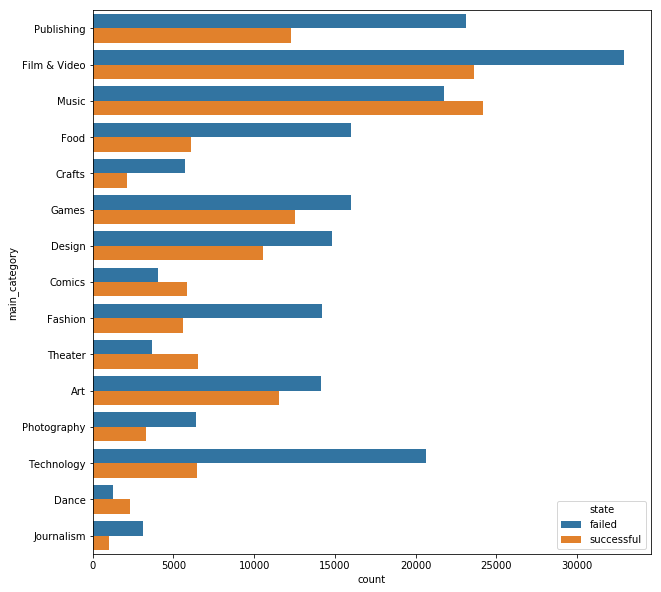

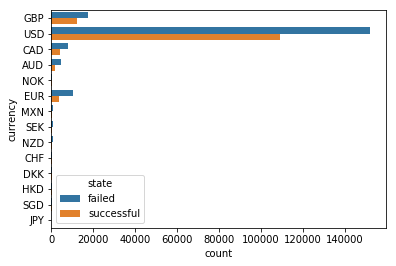

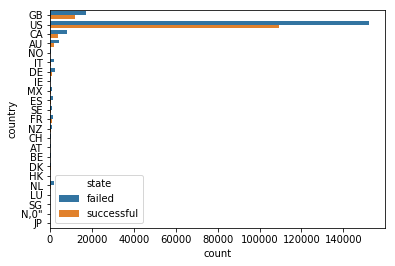

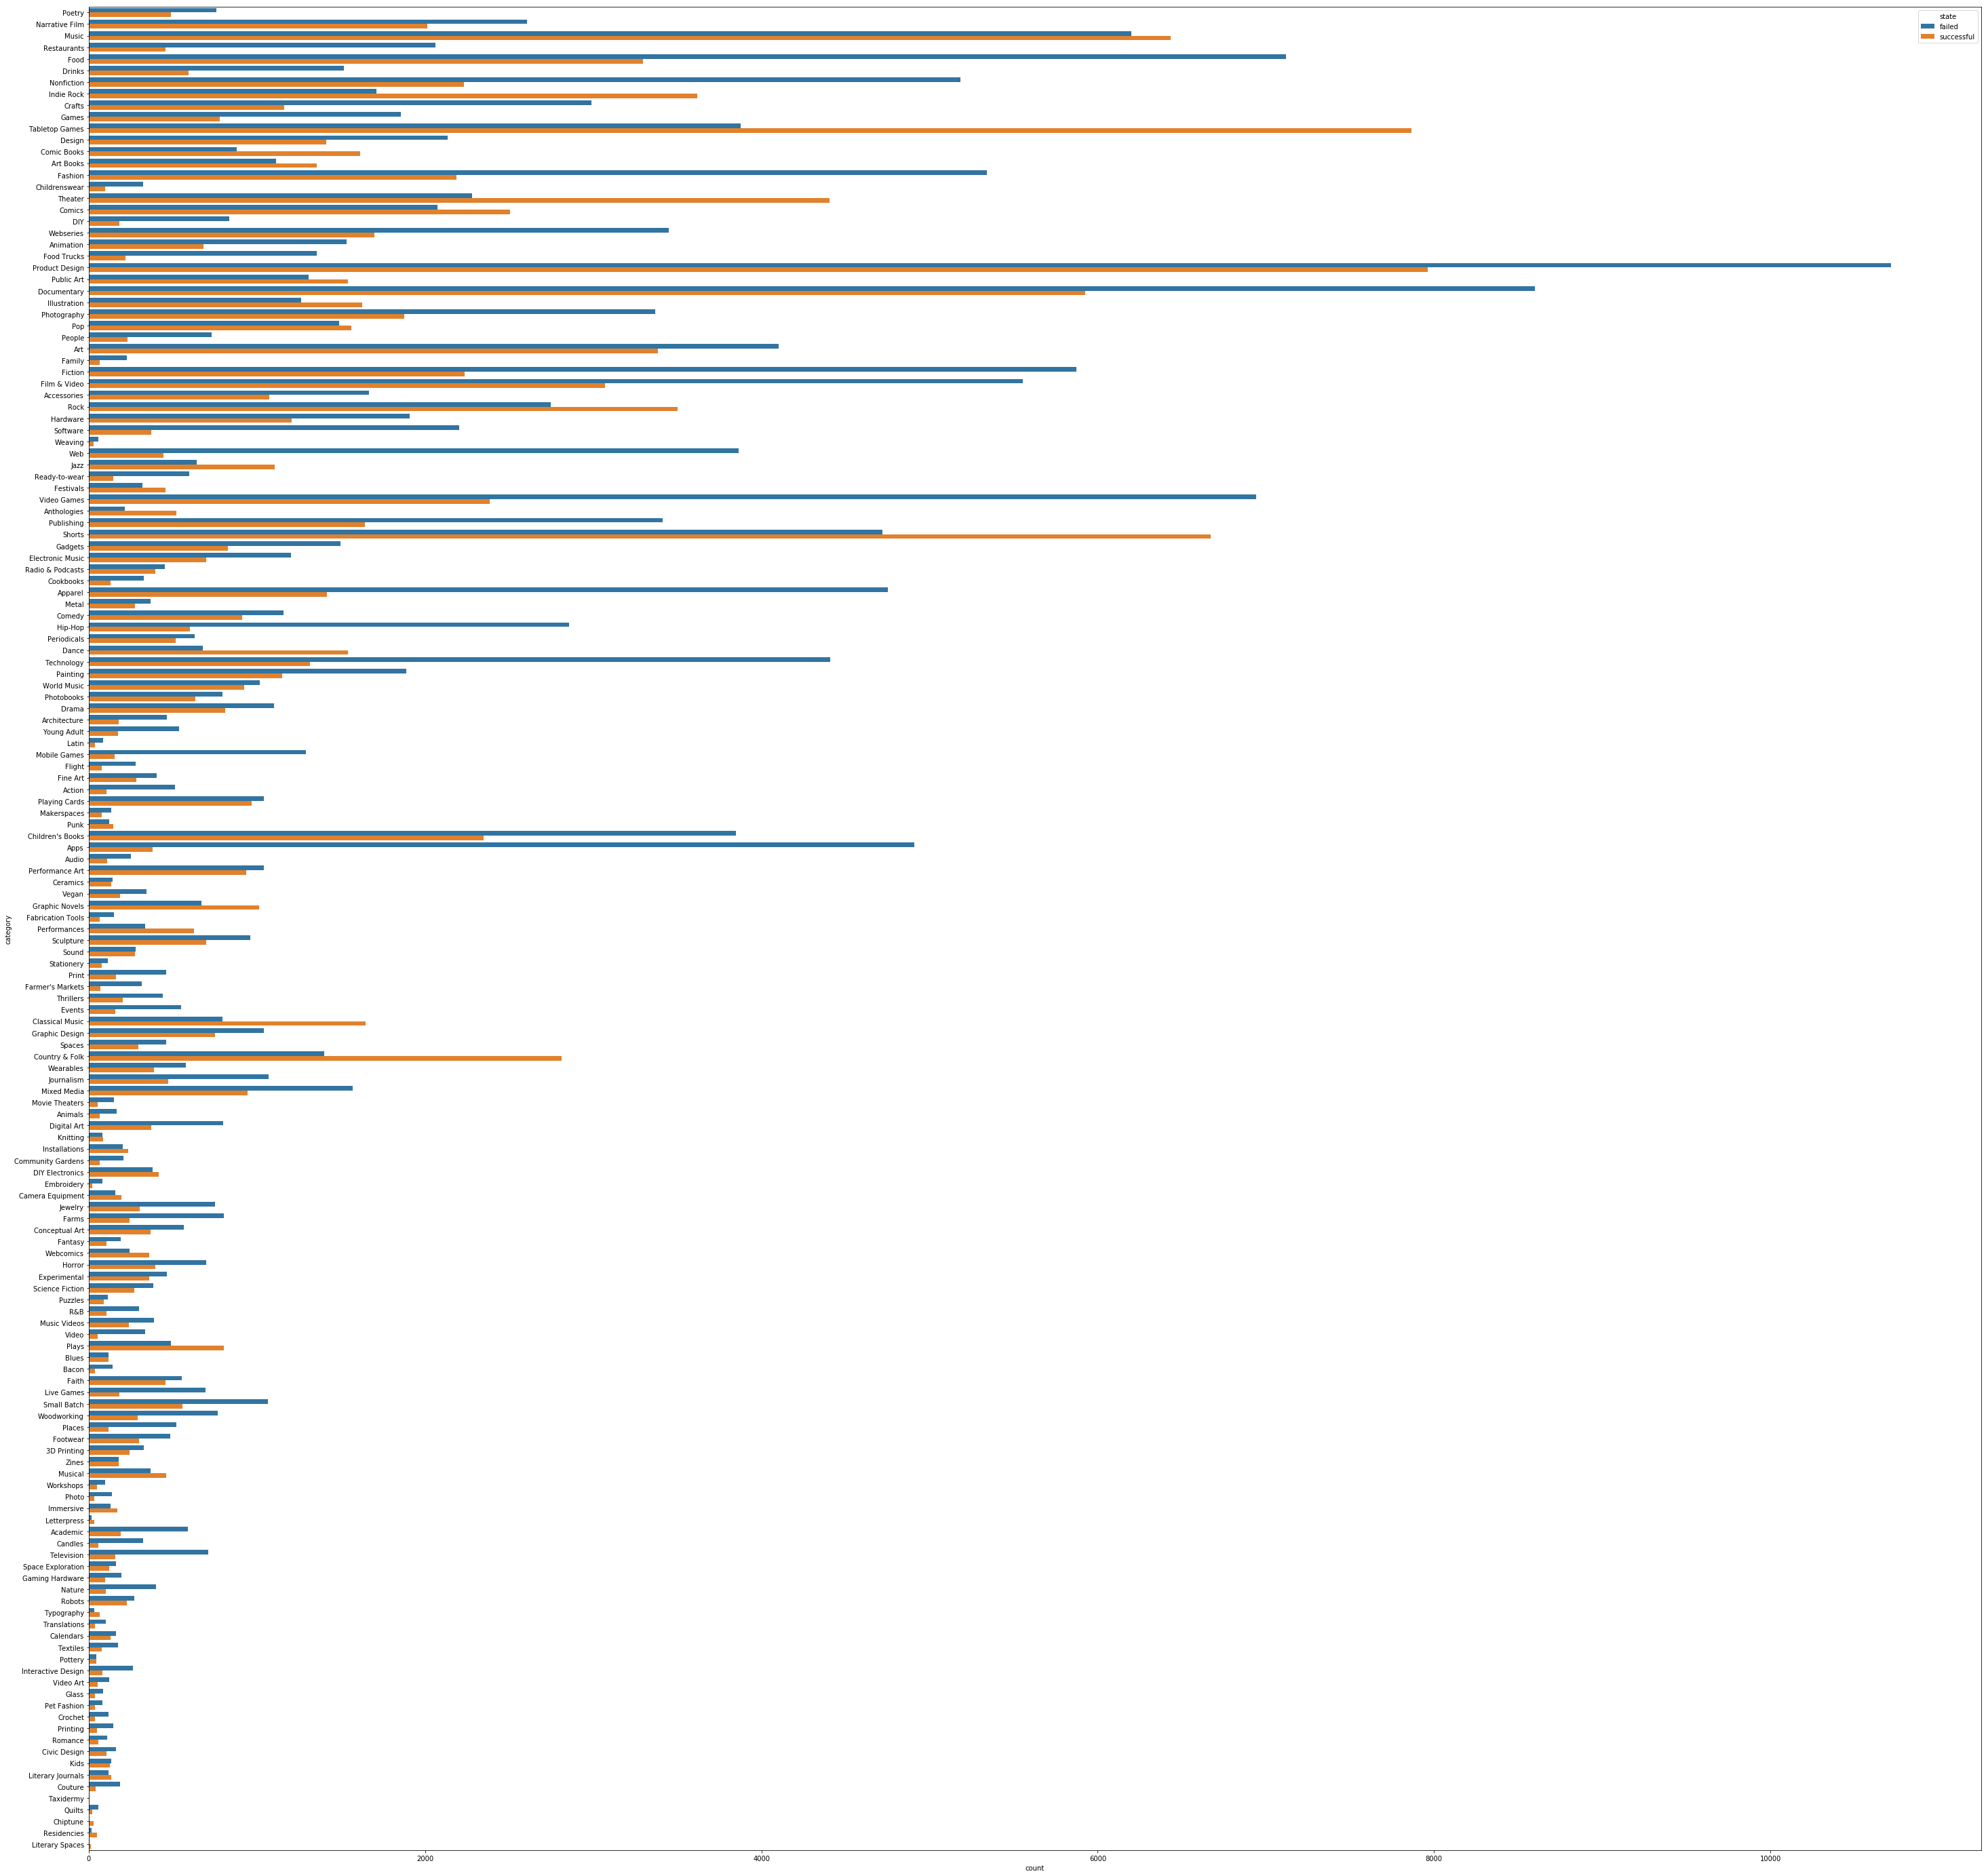

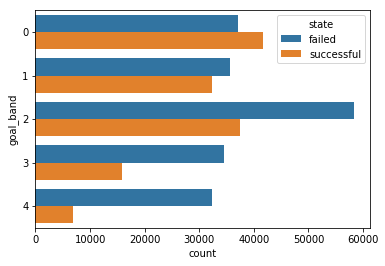

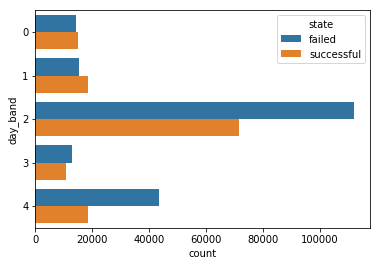

In [12]:
plt.figure(figsize = (10, 10))

sns.countplot(y = "main_category", hue = "state", hue_order = ["failed", "successful"], data = df_new)
plt.show()

sns.countplot(y = "currency", hue = "state", hue_order = ["failed", "successful"], data = df_new)
plt.show()

sns.countplot(y = "country", hue = "state", hue_order = ["failed", "successful"], data = df_new)
plt.show()

plt.figure(figsize = (50, 50))
sns.countplot(y = "category", hue = "state", hue_order = ["failed", "successful"], data = df_new)
plt.show()

sns.countplot(y = "goal_band", hue = "state", hue_order = ["failed", "successful"], data = df_new)
plt.show()

sns.countplot(y = "day_band", hue = "state", hue_order = ["failed", "successful"], data = df_new)
plt.show()


各カテゴリ変数の内容を確認する

In [13]:
df_new["main_category"].value_counts()

Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

In [14]:
df_new["category"].value_counts()

Product Design       18680
Documentary          14523
Music                12633
Tabletop Games       11744
Shorts               11394
Food                 10416
Video Games           9328
Film & Video          8624
Fiction               8108
Fashion               7529
Art                   7486
Nonfiction            7414
Theater               6684
Rock                  6246
Children's Books      6198
Apparel               6166
Technology            5726
Indie Rock            5329
Apps                  5287
Photography           5246
Webseries             5148
Publishing            5052
Narrative Film        4618
Comics                4581
Web                   4309
Country & Folk        4213
Crafts                4152
Design                3547
Hip-Hop               3459
Hardware              3115
                     ...  
Blues                  234
Animals                229
Couture                227
Fabrication Tools      215
Makerspaces            208
Movie Theaters         201
P

In [15]:
df_new["country"].value_counts()

US      261360
GB       29454
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       210
LU          57
JP          23
Name: country, dtype: int64

In [16]:
df_new["currency"].value_counts()

USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

In [17]:
df_new["goal_band"].value_counts()

2    95783
0    78668
1    67797
3    50356
4    39071
Name: goal_band, dtype: int64

In [18]:
df_new["day_band"].value_counts()

2    183568
4     61748
1     33885
0     29063
3     23411
Name: day_band, dtype: int64

ここで国と通貨は似たような情報であると考えられるため，両者をダミー変数化して相関係数を求めて調べてみる

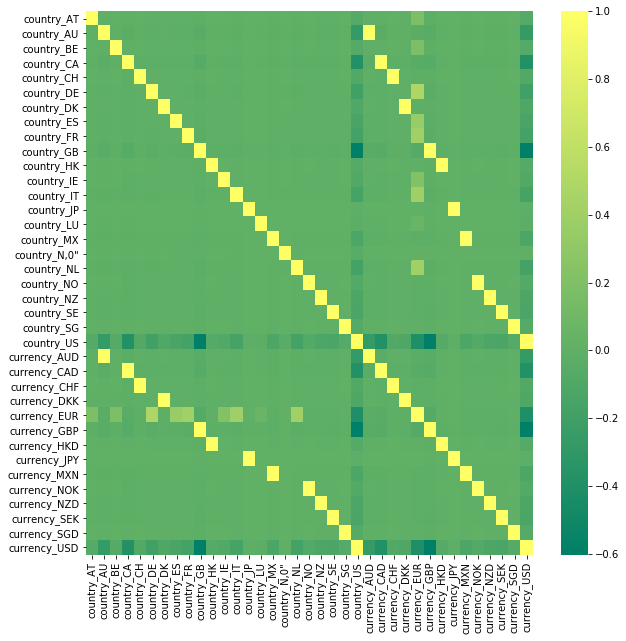

In [19]:
Check = df_new.loc[:, ["country", "currency"]]
Check = pd.get_dummies(Check[["country", "currency"]])
plt.figure(figsize = (10, 10))
sns.heatmap(Check.corr(), cmap = "summer")

In [20]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Check.values, i) for i in range(Check.shape[1])]
vif["features"] = Check.columns

print(vif)

C:\Users\nishihara\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


    VIF Factor      features
0          inf    country_AT
1          inf    country_AU
2          inf    country_BE
3          inf    country_CA
4          inf    country_CH
5          inf    country_DE
6          inf    country_DK
7          inf    country_ES
8          inf    country_FR
9          inf    country_GB
10         inf    country_HK
11         inf    country_IE
12         inf    country_IT
13         inf    country_JP
14         inf    country_LU
15         inf    country_MX
16         inf  country_N,0"
17         inf    country_NL
18         inf    country_NO
19         inf    country_NZ
20         inf    country_SE
21         inf    country_SG
22         inf    country_US
23         inf  currency_AUD
24         inf  currency_CAD
25         inf  currency_CHF
26         inf  currency_DKK
27         inf  currency_EUR
28         inf  currency_GBP
29         inf  currency_HKD
30         inf  currency_JPY
31         inf  currency_MXN
32         inf  currency_NOK
33         inf

heatmapより国と通貨の間には強い相関関係があるという事がわかる．

更に，VIFを用いて多重共線性の有無を調べると全ての変数において多重共線性が発生しているためcountryかcurrencyを消す必要があると考えられる．

尚，国と通貨の対応は表のとおりである．

![](通貨.png)

どちらかの変数を消す必要があるのだが，ここでcountryの中に「N,0"」という謎のデータが入っている．「これは原因不明のエラーであるためN,0"のデータは省いてください」という旨のデータ作成者の書き込みがあった為，今回はcountryを削除する．

main_categroyとcategoryも似たような情報を持つと考えられるため，同様の手順で調べていく．

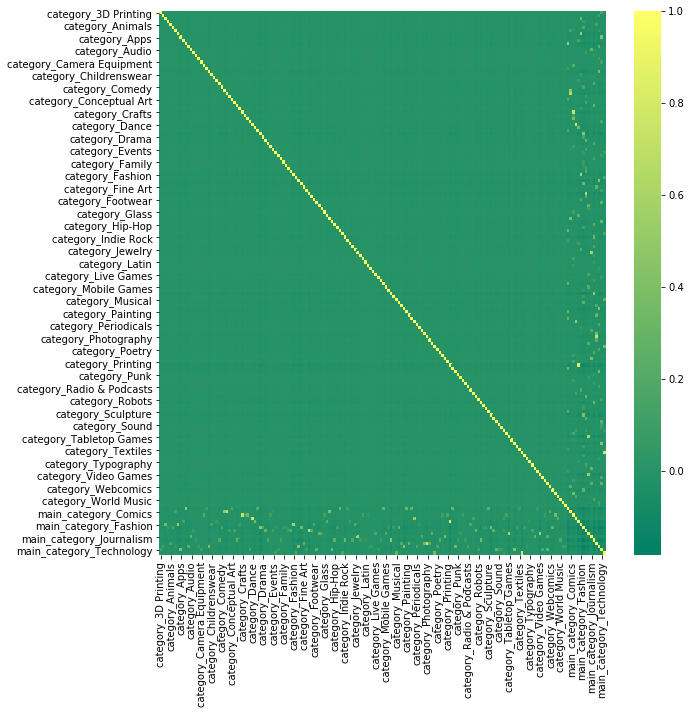

In [21]:
Check = df_new.loc[:, ["category", "main_category"]]
Check = pd.get_dummies(Check[["category", "main_category"]])
plt.figure(figsize = (10, 10))
sns.heatmap(Check.corr(), cmap = "summer")

In [22]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Check.values, i) for i in range(Check.shape[1])]
vif["features"] = Check.columns

print(vif)

     VIF Factor                    features
0           inf        category_3D Printing
1           inf           category_Academic
2           inf        category_Accessories
3           inf             category_Action
4           inf            category_Animals
5           inf          category_Animation
6           inf        category_Anthologies
7           inf            category_Apparel
8           inf               category_Apps
9           inf       category_Architecture
10          inf                category_Art
11          inf          category_Art Books
12          inf              category_Audio
13          inf              category_Bacon
14          inf              category_Blues
15          inf          category_Calendars
16          inf   category_Camera Equipment
17          inf            category_Candles
18          inf           category_Ceramics
19          inf   category_Children's Books
20          inf      category_Childrenswear
21          inf           catego

In [23]:
print(vif.min())

VIF Factor                 9157.11
features      category_3D Printing
dtype: object


In [24]:
df_state = df_new.loc[df_new["state"] == "successful", :]
df_state.groupby(["main_category", "category"])["state"].count()

main_category  category         
Art            Art                  3385
               Ceramics              132
               Conceptual Art        366
               Digital Art           371
               Illustration         1626
               Installations         233
               Mixed Media           945
               Painting             1149
               Performance Art       934
               Public Art           1543
               Sculpture             698
               Textiles               77
               Video Art              51
Comics         Anthologies           303
               Comic Books          1614
               Comics               2506
               Events                 50
               Graphic Novels       1011
               Webcomics             358
Crafts         Candles                55
               Crafts               1162
               Crochet                35
               DIY                   183
               Embroider

以上の結果より，main_categoryとcategoryには強い相関があり，多重共線性が生じていることがわかる．その為どちらか一方を削除する．

同じカテゴリでもサブカテゴリによって成功の割合が変動するため，main_categoryを削除する

In [25]:
df_new = df_new.drop(["country", "main_category"], axis = 1)

In [26]:
#説明変数をダミー変数に変換．また，stateを0,1の2値に変換
df_new = df_new.loc[:, ["state", "category", "currency", "goal_band", "day_band"]]
use_col_dum = ["category", "currency", "goal_band", "day_band"]
dum_data = pd.get_dummies(df_new[use_col_dum])
dum_data.insert(0, "state", df_new["state"])
dum_data.loc[dum_data["state"] == "failed", "state"] = 0
dum_data.loc[dum_data["state"] == "successful", "state"] = 1
dum_data.head()

,state,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,...,goal_band_0,goal_band_1,goal_band_2,goal_band_3,goal_band_4,day_band_0,day_band_1,day_band_2,day_band_3,day_band_4
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


# 3. 特徴量選択

Lassoによる特徴選択を行う

In [27]:
estimator = LassoCV(normalize = True, cv = 10)
sfm = SelectFromModel(estimator, threshold = 1e-5)

In [28]:
train_label = dum_data["state"]
train_data = dum_data.drop("state", axis = 1)

y = train_label.values
X = train_data.values

sfm.fit(X, y)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=1e-05)

In [29]:
idx = np.array(train_data.columns[sfm.get_support()])
train = train_data[idx]
X = train.values

# 4.モデル製作

ロジスティック回帰，ランダムフォレスト，NN(MLP)の3つで検証を行う

In [30]:
def setSummary(acc, recall, precision, f1):
    return {
        'accuracy': acc,
        'recall': recall,
        'precision': precision,
        'f1': f1
        }

summary = {}

**4.1 ロジスティック回帰**

In [31]:
split_num = 1
n_split = 5 # グループ数を設定（今回は5分割）
acc_logi = 0
pre_logi = 0
rec_logi = 0
f1_logi = 0

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    # 学習用データを使ってロジスティック回帰モデルを学習
    clf = SGDClassifier(loss = "log", penalty = "none", max_iter = 10000, fit_intercept = True, random_state = 1234, tol = 1e-3)
    clf.fit(X_train, y_train)
        

    # テストデータに対する予測を実行
    y_est = clf.predict(X_test)
    acc_logi += 100 * accuracy_score(y_test, y_est)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_est)
    pre_logi += precision[0]
    rec_logi += recall[0]
    f1_logi += f1_score[0]
    
    
    #テストデータに対する各評価値を計算
    print("Fold %s"%split_num)
    print("正答率: %s"%round(100*accuracy_score(y_test, y_est), 1))
    print("適合率: %s"%round(precision[0], 3))
    print("再現率: %s"%round(recall[0], 3))
    print("F1値: %s"%round(f1_score[0], 3))
    print()
    
    split_num += 1
    
acc_logi /= n_split
pre_logi /= n_split
rec_logi /= n_split
f1_logi /= n_split

#クロスバリデーションの各評価値
print("Cross Validation Accuray = %s"%round(acc_logi, 1))
print("Cross Validation Precision = %s"%round(pre_logi, 3))
print("Cross Validation Recall = %s"%round(rec_logi, 3))
print("Cross Validation F1-score = %s"%round(f1_logi, 3))

summary["Logistic regression"] = setSummary(acc_logi, pre_logi, rec_logi, f1_logi)

Fold 1
正答率: 67.3
適合率: 0.704
再現率: 0.782
F1値: 0.741

Fold 2
正答率: 67.2
適合率: 0.687
再現率: 0.826
F1値: 0.75

Fold 3
正答率: 67.4
適合率: 0.689
再現率: 0.825
F1値: 0.751

Fold 4
正答率: 67.4
適合率: 0.7
再現率: 0.792
F1値: 0.743

Fold 5
正答率: 67.3
適合率: 0.712
再現率: 0.758
F1値: 0.734

Cross Validation Accuray = 67.3
Cross Validation Precision = 0.698
Cross Validation Recall = 0.797
Cross Validation F1-score = 0.744


**4.2 ランダムフォレスト**

In [32]:
#グリッドサーチで事前にハイパーパラメータを決める
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
parameters = {'n_estimators':[10, 20, 30], 'max_depth':[5, 10, 15], 'min_samples_leaf':[2, 3, 4], 'min_samples_split':[2, 3, 4]} # ここを編集する
model = RandomForestClassifier(criterion = "gini", random_state = 1234) 
clf = GridSearchCV(model, parameters, cv=3,)

clf.fit(X_train, y_train)
print(clf.best_params_, clf.best_score_)

{'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20} 0.6546883244139594


In [33]:
split_num = 1
n_split = 5 # グループ数を設定（今回は5分割）
acc_RF = 0
pre_RF = 0
rec_RF = 0
f1_RF = 0

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    forest = RandomForestClassifier(n_estimators=clf.best_params_["n_estimators"], max_depth=clf.best_params_["max_depth"], criterion="gini", min_samples_leaf=clf.best_params_["min_samples_leaf"], min_samples_split=clf.best_params_["min_samples_split"], random_state=1234)
    forest.fit(X_train, y_train)
        

    # テストデータに対する予測を実行
    y_est = forest.predict(X_test)
    acc_RF += 100 * accuracy_score(y_test, y_est)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_est)
    pre_RF += precision[0]
    rec_RF += recall[0]
    f1_RF += f1_score[0]
    
    # テストデータに対する各評価値を計算
    print("Fold %s"%split_num)
    print("正答率: %s"%round(100*accuracy_score(y_test, y_est), 3))
    print("適合率: %s"%round(precision[0], 3))
    print("再現率: %s"%round(recall[0], 3))
    print("F1値: %s"%round(f1_score[0], 3))
    print()
    
    split_num += 1
    
acc_RF /= n_split
pre_RF /= n_split
rec_RF /= n_split
f1_RF /= n_split

#クロスバリデーションの各評価値
print("Cross Validation Accuray = %s"%round(acc_RF, 1))
print("Cross Validation Precision = %s"%round(pre_RF, 3))
print("Cross Validation Recall = %s"%round(rec_RF, 3))
print("Cross Validation F1-score = %s"%round(f1_RF, 3))

summary["RandomForest"] = setSummary(acc_RF, pre_RF, rec_RF, f1_RF)

Fold 1
正答率: 65.594
適合率: 0.653
再現率: 0.906
F1値: 0.759

Fold 2
正答率: 65.543
適合率: 0.651
再現率: 0.908
F1値: 0.758

Fold 3
正答率: 65.16
適合率: 0.648
再現率: 0.908
F1値: 0.756

Fold 4
正答率: 65.576
適合率: 0.652
再現率: 0.908
F1値: 0.759

Fold 5
正答率: 65.442
適合率: 0.651
再現率: 0.907
F1値: 0.758

Cross Validation Accuray = 65.5
Cross Validation Precision = 0.651
Cross Validation Recall = 0.907
Cross Validation F1-score = 0.758


**4.3 NN(MLP)**

In [35]:
#NNのハイパーパラメータを設定するにはグリッドサーチは不向きなため，ランダムサーチで決める

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
mlp_clf = MLPClassifier()
random_search = {"batch_size":[300, 350, 400, 450], "hidden_layer_sizes":[(120, 60, 20), (60, 30, 10), (30, 15, 5)], "max_iter":[100, 200], "random_state":[1234]}
mlp_random_search = RandomizedSearchCV(mlp_clf, random_search, cv=3, n_jobs=-1, scoring='accuracy', random_state=1234)

mlp_random_search.fit(X_train, y_train)
print(mlp_random_search.best_params_, mlp_random_search.best_score_)

{'random_state': 1234, 'max_iter': 200, 'hidden_layer_sizes': (30, 15, 5), 'batch_size': 300} 0.6723373784578277


In [36]:
split_num = 1
n_split = 5 # グループ数を設定（今回は5分割）
acc_NN = 0
pre_NN = 0
rec_NN = 0
f1_NN = 0

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    mlp = MLPClassifier(activation='relu',batch_size=mlp_random_search.best_params_["batch_size"], early_stopping=True, hidden_layer_sizes=mlp_random_search.best_params_["hidden_layer_sizes"], max_iter=mlp_random_search.best_params_["max_iter"], random_state=1234, shuffle=True, solver='adam',verbose=True, warm_start=False)
    mlp.fit(X_train, y_train)
        

    # テストデータに対する予測を実行
    y_est = mlp.predict(X_test)
    acc_NN += 100 * accuracy_score(y_test, y_est)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_est)
    pre_NN += precision[0]
    rec_NN += recall[0]
    f1_NN += f1_score[0]
    
    #テストデータに対する各評価値を計算
    print("Fold %s"%split_num)
    print("正答率: %s"%round(100*accuracy_score(y_test, y_est), 3))
    print("適合率: %s"%round(precision[0], 3))
    print("再現率: %s"%round(recall[0], 3))
    print("F1値: %s"%round(f1_score[0], 3))
    print()
    
    split_num += 1
    
acc_NN /= n_split
pre_NN /= n_split
rec_NN /= n_split
f1_NN /= n_split

#クロスバリデーションの各評価値
print("Cross Validation Accuray = %s"%round(acc_NN, 1))
print("Cross Validation Precision = %s"%round(pre_NN, 3))
print("Cross Validation Recall = %s"%round(rec_NN, 3))
print("Cross Validation F1-score = %s"%round(f1_NN, 3))

summary["NN"] = setSummary(acc_NN, pre_NN, rec_NN, f1_NN)

Iteration 1, loss = 0.61772253
Validation score: 0.673099
Iteration 2, loss = 0.59347512
Validation score: 0.677734
Iteration 3, loss = 0.59145364
Validation score: 0.678300
Iteration 4, loss = 0.59041799
Validation score: 0.675925
Iteration 5, loss = 0.58955170
Validation score: 0.678865
Iteration 6, loss = 0.58892564
Validation score: 0.678789
Iteration 7, loss = 0.58835444
Validation score: 0.679732
Iteration 8, loss = 0.58798665
Validation score: 0.678413
Iteration 9, loss = 0.58754692
Validation score: 0.678714
Iteration 10, loss = 0.58727593
Validation score: 0.677546
Iteration 11, loss = 0.58701887
Validation score: 0.679619
Iteration 12, loss = 0.58675516
Validation score: 0.677885
Iteration 13, loss = 0.58652169
Validation score: 0.679317
Iteration 14, loss = 0.58615125
Validation score: 0.679016
Iteration 15, loss = 0.58593451
Validation score: 0.676227
Iteration 16, loss = 0.58587059
Validation score: 0.677734
Iteration 17, loss = 0.58563652
Validation score: 0.676340
Iterat

## 5. まとめ

In [37]:
summary_columns = ["accuracy", "recall", "precision", "f1"]

summary_T = pd.DataFrame(summary).T

df_sort = summary_T[summary_columns].sort_values(by=["accuracy"], ascending=False)
display(df_sort)

,accuracy,recall,precision,f1
NN,67.762418,0.698421,0.808424,0.749331
Logistic regression,67.324339,0.698366,0.796654,0.743887
RandomForest,65.463179,0.650880,0.907314,0.757994


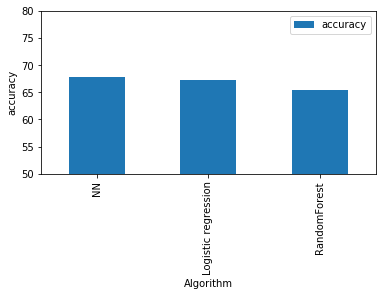

In [38]:
df_sort = df_sort[["accuracy"]]
df_sort.plot.bar(figsize=(6,3))
plt.ylabel("accuracy")
plt.xlabel("Algorithm")
plt.ylim([50.0, 80.0])
plt.show()